### The Signal $x(t)$
A time-domain signal \( x(t) \) can be represented as a combination of sinusoids of different frequencies, amplitudes, and phases. This representation is possible through the Fourier Transform, which decomposes $x(t)$ into its frequency components.

### Representation in Phase and Frequency
Any periodic signal \( x(t) \) can be represented as a sum of sinusoids (sine and cosine) using the Fourier series:

$$
x(t) = \sum_{k=-\infty}^{\infty} C_k e^{j 2 \pi k f_0 t} \tag{1}
$$

where:
- $C_k$ are the complex coefficients representing the amplitude and phase of each frequency component.
- $f_0$ is the fundamental frequency.
- $j$ is the imaginary unit.

Each term in the Fourier series can be represented as a combination of sine and cosine functions:

$$
x(t) = A \cos(2 \pi f t + \phi) \tag{2}
$$

where:
- $A$ is the amplitude of the wave.
- $f$ is the frequency.
- $\phi$ is the phase.


### Representation Using the Complex Exponential
Using Euler's formula, we can express sine and cosine functions as:

$$
\cos(\theta) = \frac{e^{j\theta} + e^{-j\theta}}{2} \tag{3}
$$
$$
\sin(\theta) = \frac{e^{j\theta} - e^{-j\theta}}{2j} \tag{4}
$$

Thus, we can rewrite $x(t)$ using complex exponentials:

$$
x(t) = \sum_{k=-\infty}^{\infty} C_k e^{j 2 \pi k f_0 t} \tag{5}
$$

Here, $C_k$ are the complex coefficients that encapsulate the amplitude and phase information of each frequency component in the signal. These coefficients are derived from the signal $x(t)$ and contain all the necessary information to reconstruct the signal in terms of its frequency components.

### Unit Step and Impulse Function
The continuous-time **unit step function** $u(t)$ is defined in a manner similar to its discrete-time counterpart. Specifically,

$$
u(t) =
\begin{cases} 
0, & t < 0 \\
1, & t \geq 0 
\end{cases} \tag{6}
$$

Note that the unit step is discontinuous at $t = 0$.


On the otherside, the impulse response is defined as the output of the system when the input is a Dirac delta function $\delta(t)$. The Dirac delta function, $\delta(t)$, is a mathematical construct that is zero everywhere except at $t = 0$, that means:

$$
\delta(t) =
\begin{cases} 
0, & t \neq 0 \\
1, & t = 0
\end{cases} \tag{7}
$$

where it is infinitely high such that its integral over all time is equal to one:

$$
\int_{-\infty}^{\infty} \delta(t) \, dt = 1 \tag{8}
$$

Note that the **unit impulse function** $\delta(t)$ is related to the unit step:

$$
\delta(t) = \frac{d}{dt} u(t) \tag{9}
$$


Let's create this signal so we can visualize it better:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'

# Parameters
Fs = 500  # Sampling frequency
T = 1 / Fs  # Sampling interval
t = np.linspace(-0.5, 0.5, Fs)  # Time vector centered at zero

# Impulse signal
impulse = np.zeros(Fs)
impulse[Fs // 2] = 1  # Delta function at the center

# Unit step signal
unit_step = np.zeros(Fs)
unit_step[Fs // 2:] = 1  # Step at t = 0

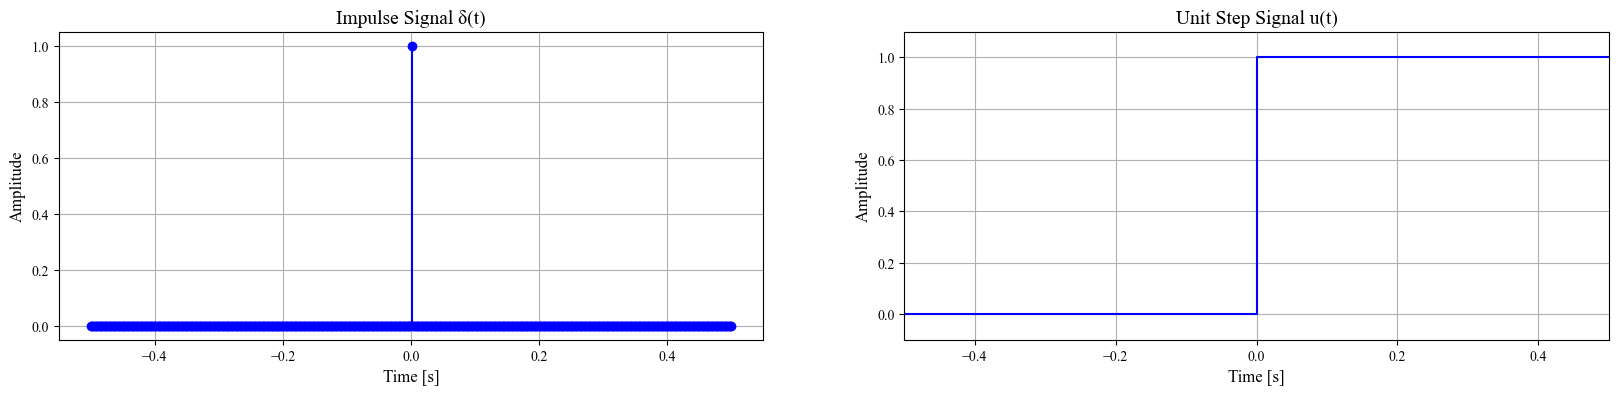

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 4))

# Plot Impulse Signal
axs[0].stem(t, impulse, basefmt='b-', linefmt='b-', markerfmt='bo')
axs[0].set_title('Impulse Signal δ(t)', fontsize=14)
axs[0].set_xlabel('Time [s]', fontsize=12)
axs[0].set_ylabel('Amplitude', fontsize=12) 
axs[0].grid()

# Plot Unit Step Signal 
axs[1].plot(t, unit_step, drawstyle='steps-post', color='b')
axs[1].set_title('Unit Step Signal u(t)', fontsize=14)
axs[1].set_xlabel('Time [s]', fontsize=12)
axs[1].set_ylabel('Amplitude', fontsize=12)
axs[1].set_ylim(-0.1, 1.1)
axs[1].set_xlim(-0.5, 0.5)
axs[1].grid()

plt.show()

### Linear Time-Invariant (LTI) Systems
Assuming that $x(t)$ is input into a linear time-invariant (LTI) system, the system's output can be analyzed using the principles of linearity and time invariance. An LTI system is linear if the principle of superposition applies. This means that for any two inputs $x_1(t)$ and $x_2(t)$, and any scalars $a$ and $b$:

$$
x(t) = \int_{-\infty}^{\infty} x(\tau) \delta(t - \tau) , d\tau \tag{10}
$$


An LTI system is time-invariant if a time shift in the input signal results in an identical time shift in the output signal. If the input $x(t)$ produces output $y(t)$, then $x(t - t_0)$ will produce $y(t - t_0)$. Thus, any continuous-time signal $x(t)$ can be represented as the integral of its weighted impulse responses. Specifically, we can write:

$$
x(t) = \int_{-\infty}^{\infty} x(\tau) \delta(t - \tau) \, d\tau \tag{11}
$$

This integral indicates that $x(t)$ can be constructed by integrating the contributions of all the impulse responses, each weighted by $x(\tau)$.

When an LTI system is excited by $\delta(t)$, the output $y(t)$ is, by definition, the impulse response $h(t)$:

$$
y(t) = h(t) \text{ when } x(t) = \delta(t) \tag{12}
$$



## Convolution and Impulse Response
In an LTI system, the output $y(t)$ for any arbitrary input $x(t)$ can be determined using a mathematical operation called convolution. Basically, the convolution is a method of "blending" two signals t to see how one modifies the other. In the context of LTI systems, it helps us understand how the input $x(t)$ is transformed by the system's impulse response $h(t)$. It works in a few steps:

- First, the function $h(t)$ is flipped and then shifted by a value $\tau$;
- This shifted version of $h(t)$ is then multiplied by the input function $x(t)$;
- Finally, the product of these two functions is integrated over all time to produce a single point in the output $y(t)$.

The convolution of $x(t)$ with the system's impulse response $h(t)$  is defined as:

$$
y(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) \, d\tau \tag{13}
$$

Convolution is commutative, which means the order in which you combine the functions does not matter:

$$
x(t) * h(t) = h(t) * x(t) \tag{14}
$$

Applying this property in Eq. (13), we can rewrite it as:

$$
y(t) = \int_{-\infty}^{\infty} h(\tau) x(t - \tau) \, d\tau \tag{15}
$$

If the input $x(t)$ is a complex exponential $e^{st}$, we can substitute $x(t - \tau)$ with $e^{s(t - \tau)}$ and rewrite Eq. (15) as:

$$
y(t) = \int_{-\infty}^{\infty} h(\tau) e^{s(t - \tau)} \, d\tau \tag{16}
$$

Expressing $e^{s(t - \tau)}$ as $e^{st}e^{-s\tau}$, and noting that $e^{st}$ can be moved outside the integral, we get:

$$
y(t) = e^{st} \int_{-\infty}^{\infty} h(\tau) e^{-s\tau} \, d\tau \tag{17}
$$

Assuming that the integral in Eq. (17) converges, we can define a new term $H(s)$:

$$
H(s) = \int_{-\infty}^{\infty} h(\tau) e^{-s\tau} \, d\tau \tag{18}
$$

Thus, the response $y(t)$ to the input $e^{st}$ is of the form:

$$
y(t) = H(s) e^{st} \tag{19}
$$

## Filtering 

With $H(s)$ representing the system's response in the frequency domain, we can consider the practical implications of this relationship. By analyzing $H(s)$, we can understand how the system modifies different frequency components of the input signal. This insight allows us to design systems that can manipulate the frequency content of signals in desired ways.

For instance, we can design filters that selectively remove or attenuate specific frequency bands. Ideal filters, which are theoretical constructs, serve as perfect examples of this concept. There are several types of ideal filters:

1. **Low-Pass Filter**: Allows frequencies below a certain cutoff frequency $\omega_c$ to pass through while attenuating frequencies above $\omega_c$. The frequency response of an ideal low-pass filter is:
$$
   H(\omega) = 
   \begin{cases} 
   1 & |\omega| \leq \omega_c \\
   0 & |\omega| > \omega_c 
   \end{cases} \tag{20}
$$

2. **High-Pass Filter**: Allows frequencies above a certain cutoff frequency $\omega_c$ to pass through while attenuating frequencies below $\omega_c$. The frequency response of an ideal high-pass filter is:

$$
   H(\omega) = 
   \begin{cases} 
   0 & |\omega| \leq \omega_c \\
   1 & |\omega| > \omega_c 
   \end{cases} \tag{21}
$$

3. **Band-Pass Filter**: Allows frequencies within a certain range $\omega_1$ to $\omega_2$ to pass through while attenuating frequencies outside this range. The frequency response of an ideal band-pass filter is:
$$
   H(\omega) = 
   \begin{cases} 
   1 & \omega_1 \leq |\omega| \leq \omega_2 \\
   0 & \text{otherwise} 
   \end{cases} \tag{22}
$$

4. **Band-Stop Filter**: Attenuates frequencies within a certain range $\omega_1$ to $\omega_2$ while allowing frequencies outside this range to pass through. The frequency response of an ideal band-stop filter is:

$$
   H(\omega) = 
   \begin{cases} 
   0 & \omega_1 \leq |\omega| \leq \omega_2 \\
   1 & \text{otherwise} 
   \end{cases} \tag{23}
$$

By understanding and designing the frequency response $H(s)$ of a system, we can effectively control which parts of the input signal's frequency content are passed through, attenuated, or removed, thus shaping the output signal in specific ways. 
Let's see how these filters would be implemented in code:

In [24]:
# Configuration of frequency parameters
frequencies = np.linspace(0, 200, 1000)  # Frequency vector from 0 to 200 Hz

# Ideal filters
low_pass = frequencies < 60
high_pass = frequencies > 80
band_pass = (frequencies > 40) & (frequencies < 130)
band_stop = (frequencies < 40) | (frequencies > 130)

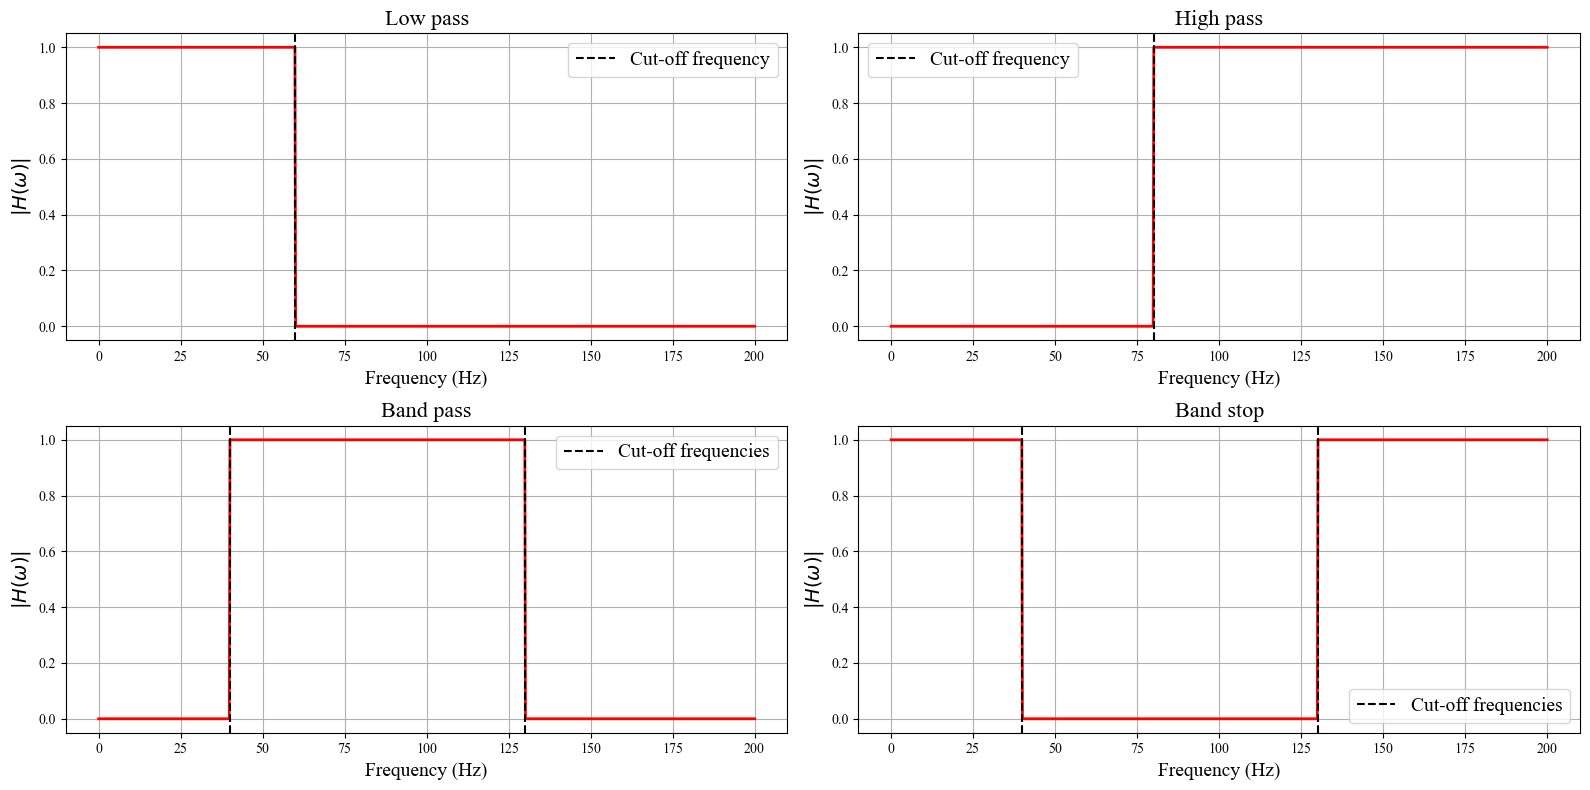

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
label_font_size = 14
title_font_size = 16

# Low-pass filter
axs[0, 0].plot(frequencies, low_pass, 'r', linewidth=2)
axs[0, 0].set_title('Low pass', fontsize=title_font_size)
axs[0, 0].set_xlabel('Frequency (Hz)', fontsize=label_font_size)
axs[0, 0].set_ylabel(r'$|H(\omega)|$', fontsize=label_font_size)
axs[0, 0].axvline(x=60, color='k', linestyle='--', label='Cut-off frequency')
axs[0, 0].legend(fontsize=label_font_size, loc='upper right')
axs[0, 0].grid()

# High-pass filter
axs[0, 1].plot(frequencies, high_pass, 'r', linewidth=2)
axs[0, 1].set_title('High pass', fontsize=title_font_size)
axs[0, 1].set_xlabel('Frequency (Hz)', fontsize=label_font_size)
axs[0, 1].set_ylabel(r'$|H(\omega)|$', fontsize=label_font_size)
axs[0, 1].axvline(x=80, color='k', linestyle='--', label='Cut-off frequency')
axs[0, 1].legend(fontsize=label_font_size, loc='upper left')
axs[0, 1].grid()

# Band-pass filter
axs[1, 0].plot(frequencies, band_pass, 'r', linewidth=2)
axs[1, 0].set_title('Band pass', fontsize=title_font_size)
axs[1, 0].set_xlabel('Frequency (Hz)', fontsize=label_font_size)
axs[1, 0].set_ylabel(r'$|H(\omega)|$', fontsize=label_font_size)
axs[1, 0].axvline(x=40, color='k', linestyle='--', label='Cut-off frequencies')
axs[1, 0].axvline(x=130, color='k', linestyle='--')
axs[1, 0].legend(fontsize=label_font_size, loc='upper right')
axs[1, 0].grid()

# Band-stop filter
axs[1, 1].plot(frequencies, band_stop, 'r', linewidth=2)
axs[1, 1].set_title('Band stop', fontsize=title_font_size)
axs[1, 1].set_xlabel('Frequency (Hz)', fontsize=label_font_size)
axs[1, 1].set_ylabel(r'$|H(\omega)|$', fontsize=label_font_size)
axs[1, 1].axvline(x=40, color='k', linestyle='--', label='Cut-off frequencies')
axs[1, 1].axvline(x=130, color='k', linestyle='--')
axs[1, 1].legend(fontsize=label_font_size, loc='lower right')
axs[1, 1].grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

These plots represent the ideal filters and their effect on different frequency bands:
- The Low-Pass Filter allows frequencies below 60 Hz to pass through while excluding frequencies above 60 Hz.
- The High-Pass Filter allows frequencies above 80 Hz to pass through while excluding frequencies below 80 Hz.
- The Band-Pass Filter allows frequencies between 40 Hz and 130 Hz to pass through while excluding frequencies outside this range.
- The Band-Stop Filter excludes frequencies between 40 Hz and 130 Hz while allowing frequencies outside this range to pass through.

Since the unit impulse $\delta (t)$ contains all frequencies, let's apply these filters to the unit impulse and observe the resulting signals.

In [ ]:
from scipy.fft import fft, ifft, fftfreq

# Ideal filters in frequency domain
frequencies = fftfreq(Fs, T)

# Ideal Low-Pass Filter: Pass frequencies below 60 Hz
low_pass_filter = np.abs(frequencies) < 60
low_pass_filtered_impulse_fft = fft(impulse) * low_pass_filter
low_pass_filtered_impulse = ifft(low_pass_filtered_impulse_fft).real

# Ideal High-Pass Filter: Pass frequencies above 80 Hz
high_pass_filter = np.abs(frequencies) > 80
high_pass_filtered_impulse_fft = fft(impulse) * high_pass_filter
high_pass_filtered_impulse = ifft(high_pass_filtered_impulse_fft).real

# Ideal Band-Pass Filter: Pass frequencies between 40 and 130 Hz
band_pass_filter = (np.abs(frequencies) > 40) & (np.abs(frequencies) < 130)
band_pass_filtered_impulse_fft = fft(impulse) * band_pass_filter
band_pass_filtered_impulse = ifft(band_pass_filtered_impulse_fft).real

# Ideal Band-Stop Filter: Reject frequencies between 40 and 130 Hz
band_stop_filter = (np.abs(frequencies) < 40) | (np.abs(frequencies) > 130)
band_stop_filtered_impulse_fft = fft(impulse) * band_stop_filter
band_stop_filtered_impulse = ifft(band_stop_filtered_impulse_fft).real

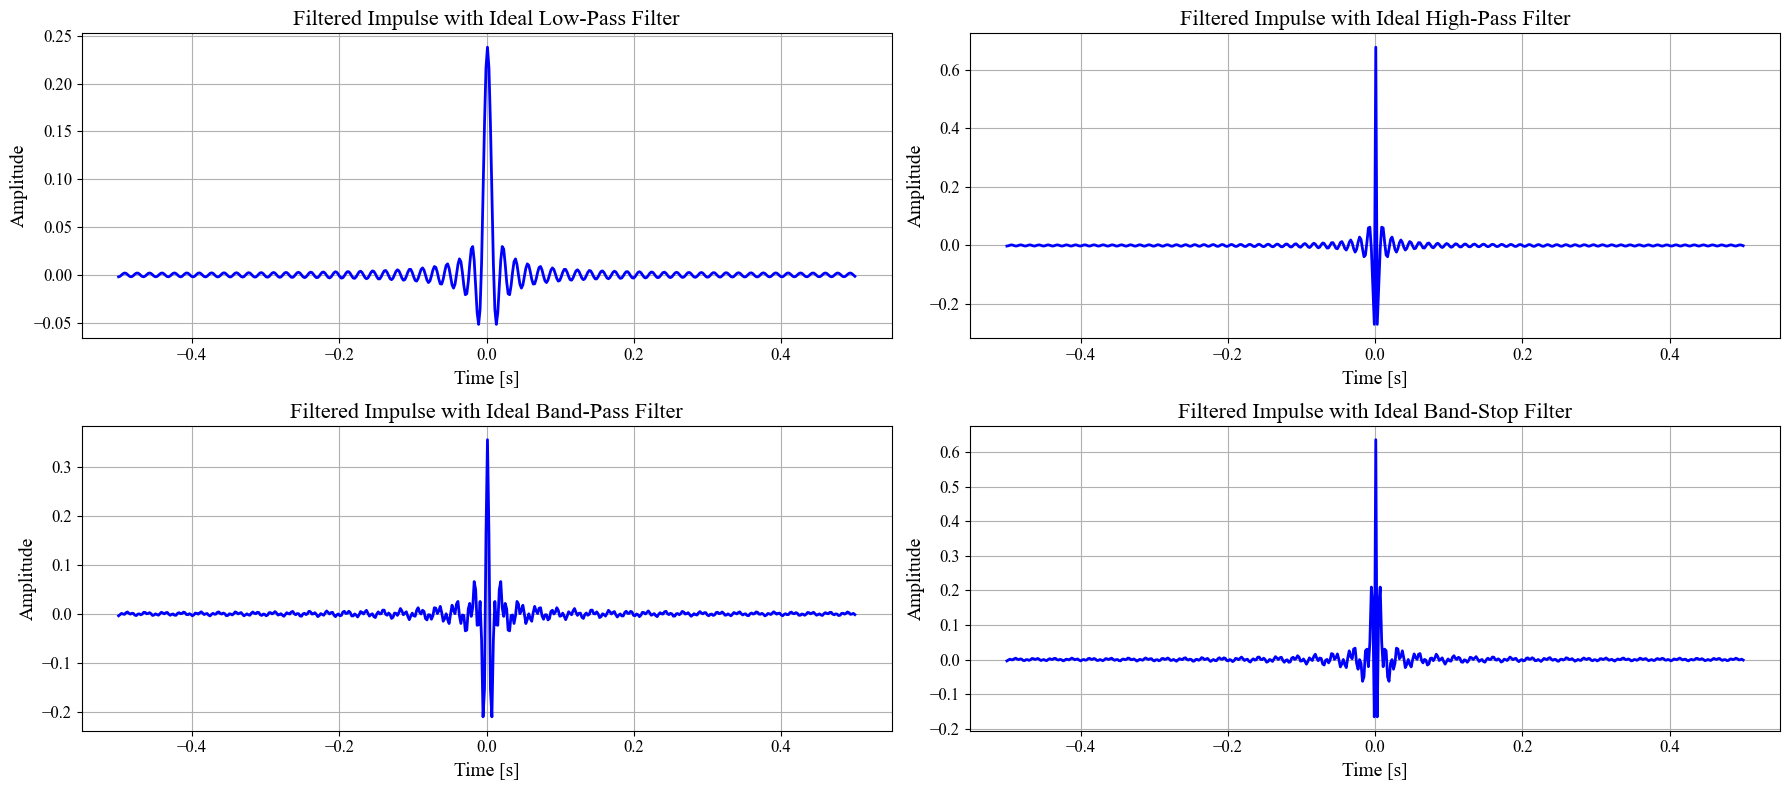

In [22]:
# Plot the filtered impulse signals
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

label_font_size = 14
title_font_size = 16
tick_label_size = 12

# Low-pass filter
axs[0, 0].plot(t, low_pass_filtered_impulse, 'b', linewidth=2)
axs[0, 0].set_title('Filtered Impulse with Ideal Low-Pass Filter', fontsize=title_font_size)
axs[0, 0].set_xlabel('Time [s]', fontsize=label_font_size)
axs[0, 0].set_ylabel('Amplitude', fontsize=label_font_size)
axs[0, 0].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[0, 0].grid()

# High-pass filter
axs[0, 1].plot(t, high_pass_filtered_impulse, 'b', linewidth=2)
axs[0, 1].set_title('Filtered Impulse with Ideal High-Pass Filter', fontsize=title_font_size)
axs[0, 1].set_xlabel('Time [s]', fontsize=label_font_size)
axs[0, 1].set_ylabel('Amplitude', fontsize=label_font_size)
axs[0, 1].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[0, 1].grid()

# Band-pass filter
axs[1, 0].plot(t, band_pass_filtered_impulse, 'b', linewidth=2)
axs[1, 0].set_title('Filtered Impulse with Ideal Band-Pass Filter', fontsize=title_font_size)
axs[1, 0].set_xlabel('Time [s]', fontsize=label_font_size)
axs[1, 0].set_ylabel('Amplitude', fontsize=label_font_size)
axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[1, 0].grid()

# Band-stop filter
axs[1, 1].plot(t, band_stop_filtered_impulse, 'b', linewidth=2)
axs[1, 1].set_title('Filtered Impulse with Ideal Band-Stop Filter', fontsize=title_font_size)
axs[1, 1].set_xlabel('Time [s]', fontsize=label_font_size)
axs[1, 1].set_ylabel('Amplitude', fontsize=label_font_size)
axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_label_size)
axs[1, 1].grid()

plt.tight_layout()
plt.show()

From each plot, we can make some conclusions:

- Filtered Impulse with Ideal Low-Pass Filter: This filter smooths out the high-frequency components, resulting in significant oscillations or "ringing" around the impulse;
- Filtered Impulse with Ideal High-Pass Filter: The filter attenuates low frequencies, leading to oscillations around the impulse;
- Filtered Impulse with Ideal Band-Pass Filter: It allows only a specific frequency range to pass, leading to oscillations before and after the impulse;
- Filtered Impulse with Ideal Band-Stop Filter: The filter attenuates a specific frequency range, producing a similar ringing effect around the impulse.

These responses plots illustrate the theoretical behavior of ideal filters, showing that while they perfectly allow or block certain frequency ranges, they introduce significant artifacts and practical challenges.

## Why Ideal Filters are Impractical?

1. **Non-causal Nature**: Ideal filters require an infinite amount of time to process the signal because they rely on a perfect sinc function in the time domain. This makes them non-causal, meaning they cannot be implemented in real-time systems that require immediate processing of signals.

2. **Infinite Impulse Response**: The impulse response of an ideal filter extends infinitely in both directions, which is not feasible in practical applications. Real filters need to have a finite impulse response to be implemented in hardware or software.

3. **Ringing Artifacts**: When applying an ideal filter, especially the low-pass filter, the transition between passband and stopband is abrupt. This causes oscillations or "ringing" in the time domain. These artifacts can distort the signal and reduce the quality of the filtered output.

## How to Design a Practical Filter?

Designing a practical filter involves considering the limitations and challenges that ideal filters present. Figure bellow shows the comparisson between an ideal fillter, represented by the red line, and a pratical filter, represented by the blue line. As it can be seen, unlike the sharp transitions of the ideal filter, the practical filter exhibits a gradual shift between its passband and stopband.

- Passband: The range of frequencies that are allowed to pass through the filter with minimal attenuation (highlighted in green).
- Transition Band: The region where the filter transitions from the passband to the stopband, smoother in the practical filter (highlighted in yellow).
- Stopband: The range of frequencies that are significantly attenuated by the filter (highlighted in red).

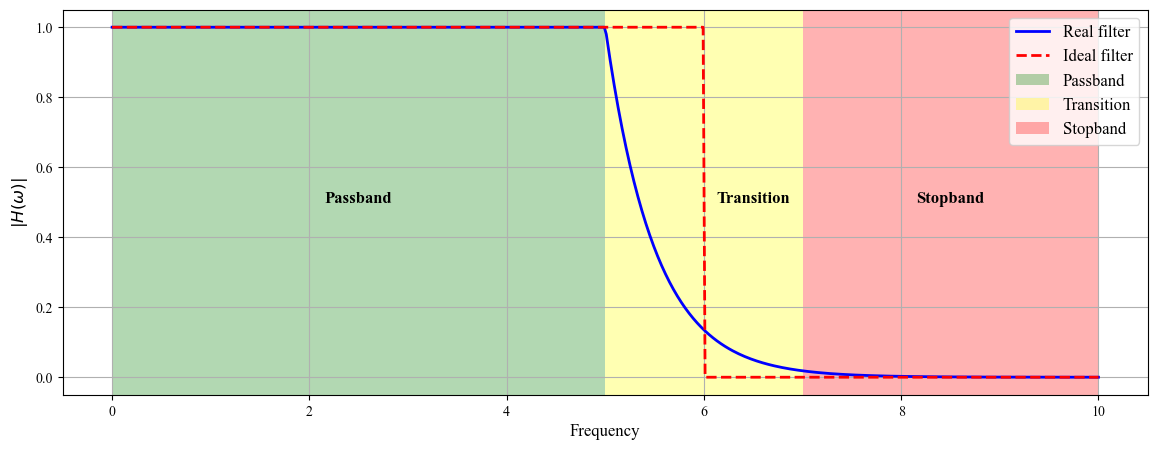

In [58]:
# Data for the plot
frequency = np.linspace(0, 10, 500)
ideal_filter = np.where(frequency < 6, 1, 0)
real_filter = np.where(frequency < 5, 1, np.exp(-2*(frequency-5)))

# Plotting the data
plt.figure(figsize=(14, 5))
plt.plot(frequency, real_filter, 'b', label='Real filter', linewidth=2)
plt.plot(frequency, ideal_filter, 'r--', label='Ideal filter', linewidth=2)
plt.axvspan(0, 5, facecolor='green', alpha=0.3, label='Passband')
plt.axvspan(5, 7, facecolor='yellow', alpha=0.3,label='Transition')
plt.axvspan(7, 10, facecolor='red', alpha=0.3, label='Stopband')

# Adding labels and title
plt.xlabel('Frequency', size=12)
plt.ylabel(r'$|H(\omega)|$', size =12)
plt.legend(loc='best', fontsize=12)

# Adding text annotations
plt.text(2.5,0.5, 'Passband', horizontalalignment='center', weight='bold', size =12)
plt.text(6.5, 0.5, 'Transition', horizontalalignment='center', weight='bold', size =12)
plt.text(8.5, 0.5, 'Stopband', horizontalalignment='center', weight='bold', size =12)

# Showing the plot
plt.grid()
plt.show()

Usually, these plots are made using a Bode plot. A Bode plot is used to represent the frequency response of a system and consists of two parts: one plot showing the magnitude response (gain) and another plot showing the phase response. Bode plots are particularly useful because:

- They provide a clear visualization of how a filter affects different frequency components of a signal.
- The logarithmic scale used for frequency makes it easier to interpret a wide range of frequencies.
- They help in understanding the stability and phase margin of control systems.

The equations used in Bode plots are:

1. **Magnitude Plot**: $20 \log_{10} |H(\omega)|$
2. **Phase Plot**: $\arg(H(\omega))$

Where $H(\omega)$ is the frequency response of the system.

There are many types of filters that can be implemented, each with its own advantages and disadvantages depending on the requirements of the project and the nature of the signal. Some common filters include: 
- **Butterworth Filter**: Known for having a flat frequency response in the passband.
- **Chebyshev Filter**: Provides a steeper roll-off than Butterworth filters but with ripples in the passband or stopband.
- **Elliptic Filter**: Offers the steepest roll-off for a given order but introduces ripples in both passband and stopband.
- **Bessel Filter**: Provides a maximally flat phase response, which is important for preserving the wave shape of filtered signals.

They will be addresses in the next notebooks.